# Import packages

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

**Import data**

In [2]:
data = pd.read_csv("Data Sets/ecommerce_data.csv")

**Show first 5 rows of data**

In [3]:
data.head()

,date,product_id,city_id,orders
0,2019-12-16,1897,26,2
1,2019-12-16,4850,26,4
2,2019-12-16,2466,26,1
3,2019-12-16,637,26,1
4,2019-12-16,3497,26,184


**Information of data sets**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523684 entries, 0 to 523683
Data columns (total 4 columns):
date          523684 non-null object
product_id    523684 non-null int64
city_id       523684 non-null int64
orders        523684 non-null int64
dtypes: int64(3), object(1)
memory usage: 16.0+ MB


In [5]:
str(data.date.dtypes)

'object'

**Lets bring date column on timestamp**

In [6]:
data["date"] = pd.to_datetime(data["date"])

In [7]:
str(data.date.dtypes)

'datetime64[ns]'

**Lets create some columns for better analysis**

In [8]:
# create year and month column from date column
data["year"] = data["date"].apply(lambda y : y.year)
data["month"] = data["date"].apply(lambda m : m.month)
data["day"] = data["date"].apply(lambda d : d.strftime('%A'))
data["week"] = data["date"].apply(lambda w : w.week)


# EDA

In [9]:
data.head()

,date,product_id,city_id,orders,year,month,day,week
0,2019-12-16,1897,26,2,2019,12,Monday,51
1,2019-12-16,4850,26,4,2019,12,Monday,51
2,2019-12-16,2466,26,1,2019,12,Monday,51
3,2019-12-16,637,26,1,2019,12,Monday,51
4,2019-12-16,3497,26,184,2019,12,Monday,51


In [10]:
# Map Month into name
dmap = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

In [11]:
# Appy dmap on month column
data["month"] = data["month"].map(dmap)

**Lets set date as a index**

In [12]:
tm_data = data.set_index("date")

In [13]:
tm_data.head()

,product_id,city_id,orders,year,month,day,week
date,,,,,,,
2019-12-16,1897,26,2,2019,Dec,Monday,51
2019-12-16,4850,26,4,2019,Dec,Monday,51
2019-12-16,2466,26,1,2019,Dec,Monday,51
2019-12-16,637,26,1,2019,Dec,Monday,51
2019-12-16,3497,26,184,2019,Dec,Monday,51


**Lets sort the date for better analysis**

In [14]:
tm_data=tm_data.sort_index(axis = 0) 

**Yearwise analysis**

In [15]:
tm_data.year.unique()

array([2018, 2019], dtype=int64)

**Which year got the most transaction?**

In [16]:
tm_data.year.value_counts()

2019    347558
2018    176126
Name: year, dtype: int64

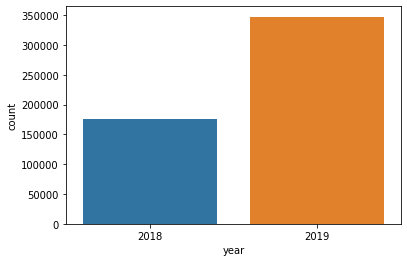

In [17]:
# Visualize 
sns.countplot(x="year",data=tm_data)

According to data set 2019 has got more transaction

**Lets do some monthwise analysis**

In [18]:
tm_data.month.value_counts()

Nov    81330
Oct    72670
Dec    59458
Jul    58730
Aug    55238
Jun    38801
Sep    31053
Apr    26954
Mar    26292
May    26043
Jan    24314
Feb    22801
Name: month, dtype: int64

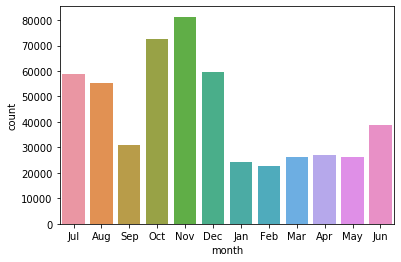

In [20]:
sns.countplot(x='month',data=tm_data)

In [26]:
byMonth = tm_data.groupby("month").count()

In [27]:
byMonth

,product_id,city_id,orders,year,day,week
month,,,,,,
Apr,26954,26954,26954,26954,26954,26954
Aug,55238,55238,55238,55238,55238,55238
Dec,59458,59458,59458,59458,59458,59458
Feb,22801,22801,22801,22801,22801,22801
Jan,24314,24314,24314,24314,24314,24314
Jul,58730,58730,58730,58730,58730,58730
Jun,38801,38801,38801,38801,38801,38801
Mar,26292,26292,26292,26292,26292,26292
May,26043,26043,26043,26043,26043,26043


**Simple plot of order per month**

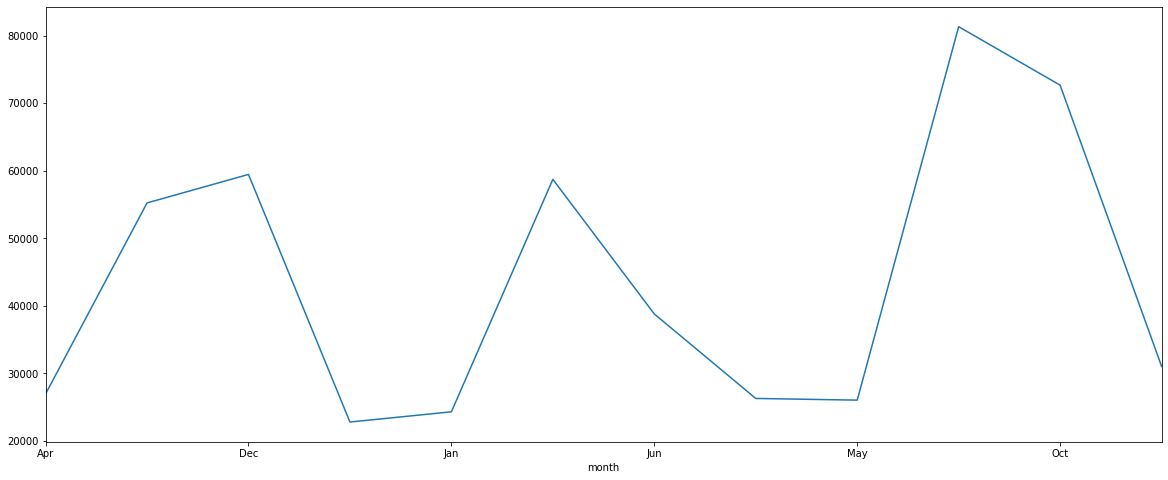

In [33]:
plt.figure(figsize=(20,8))
byMonth["orders"].plot()